---
# **I. First Phase**
---

# **A. Initialize the Project**

# 1. Prepare the Environment

## 1.1. Load the Packages and Libraries

### 1.1.1. Import Core Libraries

In [26]:
# Import Pandas and Numpy.
import pandas as pd
import numpy as np

### 1.1.2. Import Visualization Libraries

In [27]:
# Import Matplotlib and Seaborn.
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1.3. Import Scikit-learn, and Preprocessing Utility Tools from It

In [28]:
# Import Sklearn and its utility tools.
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample

### 1.1.4. Import Machine Learning Models

In [29]:
# Import Machine Learning algorithms.
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

### 1.1.5. Import Evaluation Metrics

In [30]:
# Import metrics for evaluating models from Sklearn and Scipy libraries.
from sklearn.metrics import (
    auc,
    make_scorer,
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    log_loss,
    matthews_corrcoef,
    cohen_kappa_score,
    balanced_accuracy_score,
    average_precision_score,
    brier_score_loss
)
from scipy.stats import gmean

### 1.1.6. Import Model Interpretation Tools

In [31]:
# Import SHAP library for model interpretability.
import shap
shap.initjs()

## 1.2. Configure the Tools

### 1.2.1. Set Pandas Display Options

In [32]:
# Set pandas options for full column display and formatting
pd.set_option("display.max_columns", None)         # Show all columns
pd.set_option("display.max_colwidth", None)        # Do not truncate column contents
pd.set_option("display.precision", 2)              # Set decimal precision

### 1.2.2. Set Matplotlib Display Settings

In [33]:
# Determine the font family for the plots.
plt.rcParams["font.family"] = "Times New Roman"

### 1.2.3. Set Scikit-learn to Return Pandas DataFrames by Default

In [34]:
# Set the output of the Scikit-learn transformer to a Pandas DataFrame.
sklearn.set_config(
    transform_output="pandas"
)

## 1.3. Load the Data and Simply Check It

### 1.3.1. Read the Dataset

In [35]:
# Load the dataset xslsx file into a Pandas DataFrame.
data = pd.read_csv(
    "dataset.csv"
)

# 2. Explore and Clean the Data

## 2.1. Show the Data

### 2.1.1. Display the  First 5 Rows

In [36]:
# Display the first 10 rows of the dataset.
data.head(5).style.set_caption(
    "<b>IBM Telco Customer Churn Dataset (First 5 Rows)</b>"
)

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,nan,No,0.000000,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.650000,39.650000,0.000000,20,0.000000,59.650000,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.850000,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.650000,633.300000,0.000000,0,390.800000,1024.100000,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.330000,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.450000,1752.550000,45.610000,0,203.940000,1910.880000,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.760000,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.500000,2514.500000,13.430000,0,494.000000,2995.070000,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.330000,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.500000,2868.150000,0.000000,0,234.210000,3102.360000,2,Churned,Yes,67,2793,Price,Extra data charges


## 2.2. Rename and Reorder the Features

### 2.2.1. Define the Desired Column Order

In [37]:
# Define the feature mapping for the dataset.
feature_mapping = {
    "Customer Info": [
        "Customer ID", "Gender", "Age", "Under 30", "Senior Citizen", "Married", "Dependents", "Number of Dependents"
    ],
    "Location Info": [
        "Country", "State", "City", "Zip Code", "Latitude", "Longitude", "Population"
    ],
    "Referral & Tenure": [
        "Quarter", "Referred a Friend", "Number of Referrals", "Tenure in Months", "Offer"
    ],
    "Services Signed Up": [
        "Phone Service", "Multiple Lines", "Internet Service", "Internet Type", "Unlimited Data"
    ],
    "Internet Features": [
        "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support",
        "Streaming TV", "Streaming Movies", "Streaming Music"
    ],
    "Billing & Payment": [
        "Avg Monthly Long Distance Charges", "Avg Monthly GB Download", "Monthly Charge", 
        "Total Charges", "Total Refunds", "Total Extra Data Charges", 
        "Total Long Distance Charges", "Total Revenue", "Paperless Billing", "Payment Method"
    ],
    "Customer Scores": [
        "Satisfaction Score", "CLTV", "Churn Score"
    ],
    "Churn Info": [
        "Customer Status", "Churn Label", "Churn Category", "Churn Reason"
    ]
}

### 2.2.2. Reorder the Columns

In [38]:
# Flatten the feature_mapping into a single list.
desired_order = [col for group in feature_mapping.values() for col in group]

# Reorder the DataFrame.
data = data[desired_order]

## 2.3. Remove the Unnecessary Features

### 2.3.1. Define the Features to Remove

In [39]:
# Define the features to remove from the dataset.
features_to_remove = [
    # Identifiers & Redundant Demographics
    "Customer ID",           # High cardinality identifier
    "Under 30",              # Redundant (derivable from Age)
    "Dependents",            # Redundant (derivable from Number of Dependents)

    # Location Info (low variance or low utility)
    "Country",               # Constant (all United States)
    "State",                 # Constant (all California)
    "Zip Code",              # Too granular
    "City",                  # High cardinality, many unique values
    "Latitude",              # Granular
    "Longitude",             # Granular
    "Population",            # Possibly low variation or correlated with city

    # Referral
    "Referred a Friend",     # Redundant (derivable from Number of Referrals)

    # Subscription Redundancy
    "Internet Service",      # Redundant (inferable from Internet Type)

    # Derived or Leaky Features
    "Customer Status",       # Leaks churn label
    "Churn Score",           # Usually post-hoc score, potential leakage
    "Churn Category",        # Sparse & derived from churn
    "Churn Reason",          # Sparse & derived from churn
    "CLTV",                  # Leaks churn label
    "Satisfaction Score",    # Leaks churn label

    # Time Feature
    "Quarter",               # Possibly low relevance unless time modeling is intended

    # Financial features removed in favor of only keeping Total Revenue
    "Avg Monthly Long Distance Charges",    # Usage-level detail removed
    "Avg Monthly GB Download",              # Usage-level detail removed
    "Monthly Charge",                       # Snapshot charge removed
    "Total Charges",                        # Cumulative but derived
    "Total Refunds",                        # Post-hoc financial info
    "Total Extra Data Charges",             # Specific fee detail removed
    "Total Long Distance Charges"           # Specific usage-based revenue removed
]

### 2.3.2. Remove the Excessive Features

In [40]:
# Remove the specified columns from the DataFrame.
data = data.drop(
    columns=features_to_remove
)

## 2.4. Check for Missing Values in the Data

### 2.4.1. Calculate the Percentage of Non-missing Values for Each Feature

In [42]:
# Find out the missing values percentage in the dataset.
non_missing_percentage = data.notnull().mean() * 100

### 2.4.2. Create a DataFrame Showing Non-missing Percentages

In [43]:
# Create a DataFrame from the non-missing percentage series.
non_missing_df = pd.DataFrame(
    non_missing_percentage,
    columns=["Non-Missing Percentage"]
)

# Change the index to a column named "Feature".
non_missing_df = non_missing_df.reset_index().rename(
    columns={
        "index": "Feature"
    }
)

# Increment the DataFrame index to start from 1.
non_missing_df.index = non_missing_df.index + 1

# Display the non-missing percentage table with two decimal places.
non_missing_df.style.set_caption(
    "<b>Non-Missing Percentage of Features</b>"
).format(
    {
        "Non-Missing Percentage": "{:.2f}"
    }
)

,Feature,Non-Missing Percentage
1,Gender,100.00
2,Age,100.00
3,Senior Citizen,100.00
4,Married,100.00
5,Number of Dependents,100.00
6,Number of Referrals,100.00
7,Tenure in Months,100.00
8,Offer,44.95
9,Phone Service,100.00
10,Multiple Lines,100.00


### 2.4.3. Fill the Missing Values

In [44]:
# Fill missing values in the dataset.
data["Offer"] = data["Offer"].fillna("No Offer")
data["Internet Type"] = data["Internet Type"].fillna("No Internet")

## 2.5. Distinguish the Categorical and Numeric Features and Fix Their Data Types

In [46]:
# Define the categorical features in the dataset.
categorical_features = [
    "Gender",
    "Senior Citizen",
    "Married",
    "Offer",
    "Phone Service",
    "Multiple Lines",
    "Internet Type",
    "Unlimited Data",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Paperless Billing",
    "Payment Method",
    "Churn Label"
]

# Define the numeric features in the dataset.
numeric_features = [
    "Age",
    "Number of Dependents",
    "Number of Referrals",
    "Tenure in Months",
    "Total Revenue"
]

In [47]:
# Pad the shorter list with empty strings.
max_length = max(
    len(categorical_features),
    len(numeric_features)
)

categorical_features_feature = categorical_features.copy()
numeric_features_feature = numeric_features.copy()

categorical_features_feature += [""] * (
    max_length - len(categorical_features)
)
numeric_features_feature += [""] * (
    max_length - len(numeric_features)
)

# Create a DataFrame to display feature categorization.
feature_types_df = pd.DataFrame(
    {
        "Categorical Features": categorical_features_feature,
        "Numeric Features": numeric_features_feature
    }
)

# Increment the DataFrame index to start from 1.
feature_types_df.index = feature_types_df.index + 1

# Display the feature categorization table.
feature_types_df.style.set_caption(
    "<b>Categorization of Features by Type</b>"
)

,Categorical Features,Numeric Features
1,Gender,Age
2,Senior Citizen,Number of Dependents
3,Married,Number of Referrals
4,Offer,Tenure in Months
5,Phone Service,Total Revenue
6,Multiple Lines,
7,Internet Type,
8,Unlimited Data,
9,Online Security,
10,Online Backup,


## 2.6. Check the Features' Datatypes

### 2.6.1. Create a DataFrame Showing the Datatypes of Categorical Features

In [48]:
# Create a DataFrame to display the data types of categorical features.
categorical_features_data_types = pd.DataFrame(
    data[categorical_features].dtypes,
    columns=["Categorical Features' Data Types"]
)

# Display the data types table with a caption.
categorical_features_data_types.style.set_caption(
    "<b>Categorical Features' Data Types</b>"
)

,Categorical Features' Data Types
Gender,object
Senior Citizen,object
Married,object
Offer,object
Phone Service,object
Multiple Lines,object
Internet Type,object
Unlimited Data,object
Online Security,object
Online Backup,object


### 2.6.2. Create a DataFrame Showing the Datatypes of Numeric Features

In [49]:
# Create a DataFrame to display the data types of numeric features.
numeric_features_data_types = pd.DataFrame(
    data[numeric_features].dtypes,
    columns=["Numeric Features' Data Types"]
)

# Display the data types table with a caption.
numeric_features_data_types.style.set_caption(
    "Numeric Features' Data Types"
)

,Numeric Features' Data Types
Age,int64
Number of Dependents,int64
Number of Referrals,int64
Tenure in Months,int64
Total Revenue,float64


## 2.8. Check the Categorical Features' Unique Values

### 2.8.1. Extract the Features' Unique Values Information

In [50]:
# Define a vacant list to store the rows.
rows = []

# Iterate through the categorical features.
for feature in categorical_features:

    # Get the unique values and their counts.
    value_counts = data[feature].value_counts()
    first_row = True

    # Iterate through the unique values.
    for value, count in value_counts.items():

        # Calculate the percentage.
        percentage = str(round((count / len(data)) * 100, 2))
        # Set the feature name.
        feature_name = feature if first_row else ""
        # Append the unique value, count, and percentage to the rows.
        rows.append([
            feature_name,
            value,
            count,
            percentage
        ])
        # Set the first row to False.
        first_row = False

### 2.8.2. Create a Dataframe Showing the Features' Categorical Features' Unique Values

In [51]:
# Create a dataFrame of unique values.
unique_values_df = pd.DataFrame(
    rows,
    columns=["Feature", "Unique Value", "Frequency", "Percentage"]
)

# Round the percentage to 2 decimal places.
unique_values_df["Percentage"] = unique_values_df["Percentage"].round(2)

# Style the unique values dataFrame.
unique_values_df = (
    unique_values_df.style
    .set_caption("<b>Unique Values in Categorical Features</b>")
    .hide(axis="index")
)

# Display the unique values in the categorical features.
unique_values_df

Feature,Unique Value,Frequency,Percentage
Gender,Male,3555,50.48
,Female,3488,49.52
Senior Citizen,No,5901,83.79
,Yes,1142,16.21
Married,No,3641,51.7
,Yes,3402,48.3
Offer,No Offer,3877,55.05
,Offer B,824,11.7
,Offer E,805,11.43
,Offer D,602,8.55


# **B. Get the Data Prepared and Start Learning**

# 1. Get the Data Prepared

## 1.1. Split the Data into Train and Test Sets

### 1.1.1. Split the Data

In [52]:
# Split the data into train and test sets based on the "Appendicitis" column.
data_train, data_test = train_test_split(
    data,
    test_size=0.2,
    stratify=data["Churn Label"],
    random_state=42
)

## 1.2. Upsample the Training Data to Balance the Classes

### 1.2.1. Define a Function to Upsample the Train Set

In [53]:
# Define a function to balance the dataset.
def upsampler(data, target_feature, majority_value, minority_value):
    """
    Upsamples the minority class in a binary classification dataset 
    to match the majority class size, then shuffles the resulting DataFrame.

    Args:
        data (pd.DataFrame): The input dataset containing the target feature.
        target_feature (str): The name of the column representing the class labels.
        majority_value (str): The label of the majority class.
        minority_value (str): The label of the minority class.

    Returns:
        pd.DataFrame: A new DataFrame where the minority class is upsampled 
                      to match the majority class size and the result is shuffled.
    """

    # Separate the majority and minority classes
    df_majority = data[data[target_feature] == majority_value]
    df_minority = data[data[target_feature] == minority_value]

    # Upsample the minority class
    df_minority_upsampled = resample(
        df_minority,
        replace=True,
        n_samples=len(df_majority),
        random_state=42
    )

    # Concatenate the upsampled minority and majority DataFrames.
    data_upsampled = pd.concat(
        [df_majority, df_minority_upsampled],
        ignore_index=True
    )

    # Shuffle the combined dataset.
    data_upsampled = data_upsampled.sample(
        frac=1,
        random_state=42
    ).reset_index(drop=True)

    return data_upsampled

### 1.1.2. Upsample the Datasets

In [54]:
# Upsample the training data to balance the classes.
data_train_upsampled = upsampler(
    data_train,
    target_feature="Churn Label",
    majority_value="No",
    minority_value="Yes"
    )

## 1.3. Encode the Binary Features

### 1.3.1. Define a Function for Binary Encoding

In [55]:
# Define a function to encode binary features.
def encode_binary_features(datasets, features, mapping):
    """
    Applies binary encoding to specified features across multiple datasets.

    Args:
        datasets (List[pd.DataFrame]): A list of DataFrames to be modified in-place.
        features (List[str]): The names of binary categorical features to encode.
        mapping (dict): A dictionary mapping string categories to binary values.
    """
    for df in datasets:
        for feature in features:
            df[feature] = df[feature].astype(str).map(mapping)

### 1.3.2. Determine the Categorical Features and Their Mapping

In [56]:
# Define binary categorical features to be encoded.
binary_features = [
    "Gender",
    "Senior Citizen",
    "Married",
    "Phone Service",
    "Multiple Lines",
    "Unlimited Data",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Paperless Billing",
    "Churn Label"
]

# Define mapping for binary categories.
binary_mapping = {
    "Yes": 1,
    "No": 0,
    "Male": 1,
    "Female": 0
}

### 1.3.3. Apply Binary Encoding to All Datasets

In [57]:
# Apply binary encoding to all datasets.
encode_binary_features(
    datasets=[data_train, data_train_upsampled, data_test],
    features=binary_features,
    mapping=binary_mapping
)

## 1.4. Encode the Ordinal Features

### 1.4.1. Define a Function for Ordinal Encoding

In [58]:
# Define a function to encode ordinal features.
def encode_ordinal_features(datasets, mappings):
    """
    Applies ordinal encoding to specified features across multiple datasets.

    Args:
        datasets (List[pd.DataFrame]): A list of DataFrames to be modified in-place.
        mappings (dict): A dictionary where keys are feature names and values are mapping dicts.
    """
    for df in datasets:
        for feature, mapping in mappings.items():
            df[feature] = df[feature].map(mapping)

### 1.4.2. Determine the Categorical Features and Their Mapping

In [59]:
# Define the mappings for ordinal features.
offer_mapping = {
    "No Offer": 0,
    "Offer A": 1,
    "Offer B": 2,
    "Offer C": 3,
    "Offer D": 4,
    "Offer E": 5
}

internet_type_mapping = {
    "No Internet": 0,
    "DSL": 1,
    "Cable": 2,
    "Fiber Optic": 3
}

payment_method_mapping = {
    "Mailed Check": 1,
    "Bank Withdrawal": 2,
    "Credit Card": 3
}

# Create a dictionary of ordinal mappings.
ordinal_mappings = {
    "Offer": offer_mapping,
    "Internet Type": internet_type_mapping,
    "Payment Method": payment_method_mapping
}

### 1.4.3. Apply Ordinal Encoding to All Datasets

In [60]:
# Apply ordinal encoding to all datasets.
encode_ordinal_features(
    datasets=[data_train, data_train_upsampled, data_test],
    mappings=ordinal_mappings
)

# 2. Let the Machine Learn

## 2.1. Get Ready for the Learning Process

### 2.1.1. Define a Function for Training and Testing the Models

In [62]:
# Define a function to train, predict, and evaluate a machine learning models.
def trainer(model, data_train, data_test, dependent_feature, independent_features, results_df):
    # Extract and scale
    X_train = data_train[independent_features]
    y_train = data_train[dependent_feature]
    X_test = data_test[independent_features]
    y_test = data_test[dependent_feature]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and predict.
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Binary check.
    if len(model.classes_) != 2:
        raise ValueError("Only binary classification is supported.")

    # Deine basic metrics.
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)

    pos_class = model.classes_[1]
    precision = class_report[str(pos_class)]["precision"]
    recall = class_report[str(pos_class)]["recall"]
    f1 = class_report[str(pos_class)]["f1-score"]

    # Scores and Probabilities
    if hasattr(model, "predict_proba") and callable(getattr(model, "predict_proba")):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
        logloss = log_loss(y_test, y_scores)
        brier = brier_score_loss(y_test, y_scores)
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test_scaled)
        logloss = None
        brier = None
        print("⚠️ Log Loss and Brier Score unavailable (model lacks predict_proba).")
    else:
        raise AttributeError("Model must support predict_proba or decision_function.")

    # AUC and more
    roc_auc = roc_auc_score(y_test, y_scores)
    pr_auc = average_precision_score(y_test, y_scores)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    gmean_val = gmean([recall, specificity])

    # --- Displaying DataFrames ---

    # 1. Confusion Matrix with MultiIndex for rows (Predicted) and columns (Actual)
    conf_df = pd.DataFrame(
        conf_matrix,
        index=pd.MultiIndex.from_product([["Predicted"], [0, 1]]),
        columns=pd.MultiIndex.from_product([["Actual"], [0, 1]])
    )
    display(conf_df.style.set_caption("<b>Confusion Matrix</b>"))

    # 2. Main Metrics - Custom Order and Spacing
    main_metrics_data = [
        ("ROC AUC", roc_auc * 100),
        ("F1 Score", f1 * 100),
        ("Accuracy", accuracy * 100),
        ("Specificity", specificity * 100),
        ("Precision", precision * 100),
        ("Sensitivity (Recall)", recall * 100),
    ]

    main_metrics_df = pd.DataFrame(main_metrics_data, columns=["Metric", "Value (%)"])
    main_metrics_df.index = range(1, len(main_metrics_df) + 1)

    # Display the updated main metrics DataFrame
    display(
        main_metrics_df.style
        .set_caption("<b>Main Metrics</b>")
        .format({"Value (%)": lambda x: f"{x:.2f}" if isinstance(x, float) else x})
        .hide(axis="index")
    )

    # 3. Additional Metrics
    other_metrics = {
        "PR AUC": pr_auc,
        "Balanced Accuracy": balanced_acc,
        "Log Loss": logloss if logloss is not None else "N/A",
        "Brier Score": brier if brier is not None else "N/A",
        "Matthews Correlation Coefficient (MCC)": mcc,
        "Cohen's Kappa": kappa,
        "G-Mean": gmean_val
    }
    additional_metrics_df = pd.DataFrame(
        other_metrics.items(),
        columns=["Metric", "Value"]
    )

    # Convert numeric values to percentages with 2 decimals, skip 'N/A'.
    additional_metrics_df["Value (%)"] = additional_metrics_df["Value"].apply(
        lambda x: round(x * 100, 2) if isinstance(x, float) else x
    )

    # Drop the original "Value" column.
    additional_metrics_df.drop(columns=["Value"], inplace=True)

    # Reindex starting from 1.
    additional_metrics_df.index = range(1, len(additional_metrics_df) + 1)

    # Display the additional metrics DataFrame.
    display(
        additional_metrics_df.style
        .set_caption("<b>Additional Metrics</b>")
        .format({"Value (%)": "{:.2f}"})
        .hide(axis="index")
    )

    # 4. ROC Plot
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate", fontweight="bold")
    plt.ylabel("True Positive Rate", fontweight="bold")
    plt.title(f"{model.__class__.__name__} Receiver Operating Characteristic (ROC) Curve", fontweight="bold")
    plt.legend(loc="lower right")
    plt.show()

    # Add the results to the results DataFrame.
    combined_metrics = pd.concat([main_metrics_df, additional_metrics_df])
    metrics_dict = {
        row["Metric"]: row["Value (%)"]
        for _, row in combined_metrics.iterrows()
    }

    row = {
        "Model": model.__class__.__name__,
        "Accuracy": metrics_dict.get("Accuracy"),
        "Precision": metrics_dict.get("Precision"),
        "Recall": metrics_dict.get("Sensitivity (Recall)", metrics_dict.get("Recall")),
        "F1-score": metrics_dict.get("F1 Score"),
        "ROC AUC": metrics_dict.get("ROC AUC"),
        "Specificity": metrics_dict.get("Specificity"),
        "PR AUC": metrics_dict.get("PR AUC"),
        "Balanced Accuracy": metrics_dict.get("Balanced Accuracy"),
        "Log Loss": metrics_dict.get("Log Loss"),
        "Brier Score": metrics_dict.get("Brier Score"),
        "MCC": metrics_dict.get("Matthews Correlation Coefficient (MCC)"),
        "Cohen's Kappa": metrics_dict.get("Cohen's Kappa"),
        "G-Mean": metrics_dict.get("G-Mean")
    }

    results_df.loc[len(results_df)] = row

    # Return for reuse.
    return conf_df, main_metrics_df, additional_metrics_df

### 2.1.2. Determine the Input Features

In [63]:
# Determine the independent features.
independent_features = [
    "Gender",
    "Age",
    "Senior Citizen",
    "Married",
    "Number of Dependents",
    "Number of Referrals",
    "Tenure in Months",
    "Offer",
    "Phone Service",
    "Multiple Lines",
    "Internet Type",
    "Unlimited Data",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Total Revenue",
    "Paperless Billing",
    "Payment Method",
]

### 2.1.3. Define a Table to Report the Models' Performance

In [64]:
# Define a dataframe to store the results of the first phase with all evaluation metrics.
results_first_phase = pd.DataFrame(
    columns=[
        "Model",
        "Accuracy",
        "Precision",
        "Recall",
        "F1-score",
        "ROC AUC",
        "Specificity",
        "PR AUC",
        "Balanced Accuracy",
        "Log Loss",
        "Brier Score",
        "MCC",
        "Cohen's Kappa",
        "G-Mean"
    ]
)

## 2.2. Train and Test the Models

### 2.2.1. Train and Test the SVM Model

In [65]:
# Define the SVC model.
svc_model = SVC(
    kernel="linear",
    C=1,
    probability=True,
    random_state=42
)

Metric,Value (%)
ROC AUC,88.53
F1 Score,68.82
Accuracy,79.49
Specificity,77.39
Precision,57.69
Sensitivity (Recall),85.29


Metric,Value (%)
PR AUC,70.79
Balanced Accuracy,81.34
Log Loss,43.24
Brier Score,14.23
Matthews Correlation Coefficient (MCC),56.69
Cohen's Kappa,54.38
G-Mean,81.25


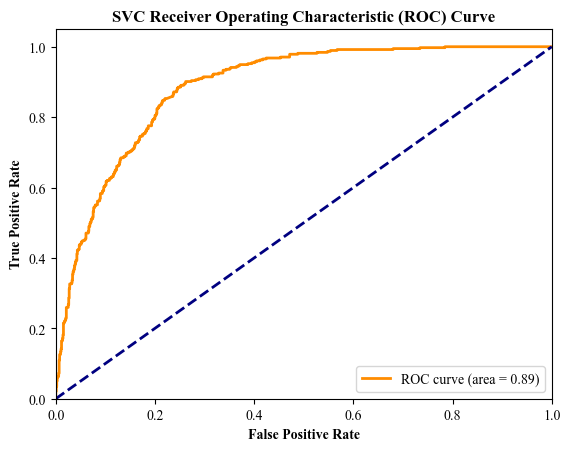

In [66]:
# Train and evaluate the SVC model.
conf_df, main_df, extra_df = trainer(
    model=svc_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.2. Train and Test the Random Forest Model

In [67]:
# Define the Random Forest model.
rf_model = RandomForestClassifier(
    n_estimators=20,
    random_state=42
)

Metric,Value (%)
ROC AUC,85.84
F1 Score,60.21
Accuracy,80.77
Specificity,90.14
Precision,66.78
Sensitivity (Recall),54.81


Metric,Value (%)
PR AUC,65.32
Balanced Accuracy,72.48
Log Loss,61.31
Brier Score,13.16
Matthews Correlation Coefficient (MCC),48.09
Cohen's Kappa,47.69
G-Mean,70.29


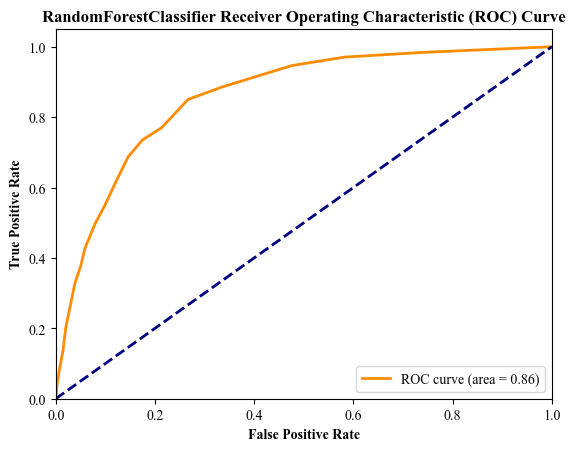

In [68]:
# Train and evaluate the SVC model.
conf_df, main_df, extra_df = trainer(
    model=rf_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.3. Train and Test the K Nearest Neighbours Model

In [69]:
# Define the Random Forest model.
knn_model = KNeighborsClassifier(
    n_neighbors=15
)

Metric,Value (%)
ROC AUC,81.80
F1 Score,60.18
Accuracy,71.54
Specificity,68.12
Precision,47.87
Sensitivity (Recall),81.02


Metric,Value (%)
PR AUC,57.14
Balanced Accuracy,74.57
Log Loss,96.57
Brier Score,18.78
Matthews Correlation Coefficient (MCC),43.62
Cohen's Kappa,40.23
G-Mean,74.29


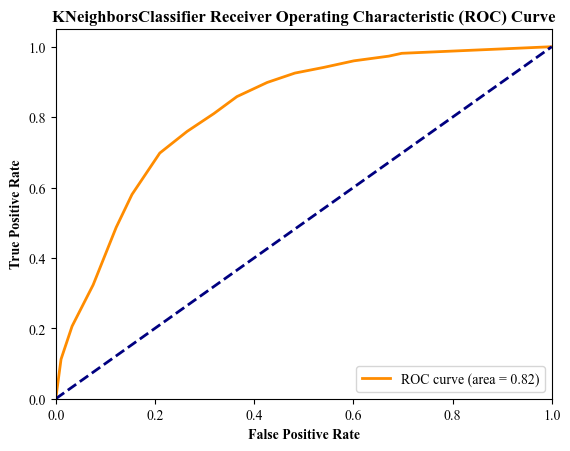

In [70]:
# Train and evaluate the SVC model.
conf_df, main_df, extra_df = trainer(
    model=knn_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.4. Train and Test the XGBoost Model

In [71]:
# Define the Random Forest model.
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

Metric,Value (%)
ROC AUC,86.38
F1 Score,65.66
Accuracy,80.70
Specificity,84.73
Precision,62.20
Sensitivity (Recall),69.52


Metric,Value (%)
PR AUC,67.61
Balanced Accuracy,77.13
Log Loss,43.84
Brier Score,13.95
Matthews Correlation Coefficient (MCC),52.45
Cohen's Kappa,52.29
G-Mean,76.75


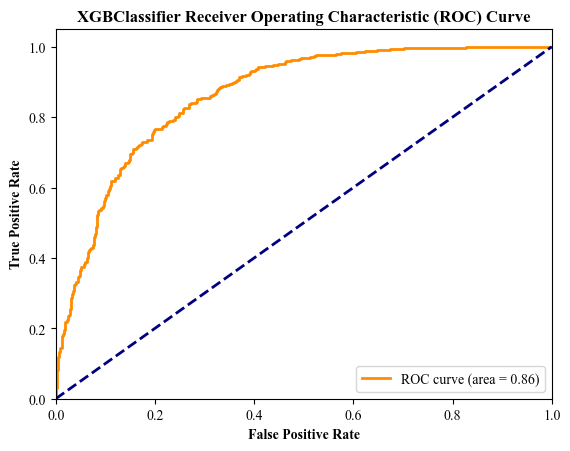

In [72]:
# Train and evaluate the SVC model.
conf_df, main_df, extra_df = trainer(
    model=xgb_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.5. Train and Test the Ada Boost Model

In [73]:
# Define the Ada Boost model.
ab_model = AdaBoostClassifier(
    n_estimators=15,
    random_state=42
)

Metric,Value (%)
ROC AUC,86.59
F1 Score,64.36
Accuracy,75.87
Specificity,73.62
Precision,52.93
Sensitivity (Recall),82.09


Metric,Value (%)
PR AUC,66.27
Balanced Accuracy,77.85
Log Loss,54.80
Brier Score,18.16
Matthews Correlation Coefficient (MCC),49.98
Cohen's Kappa,47.38
G-Mean,77.74


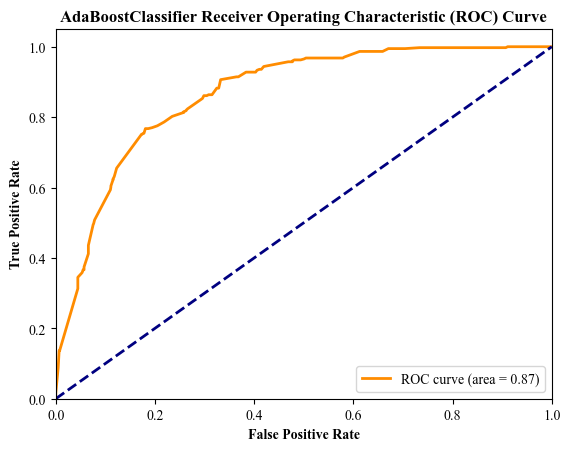

In [74]:
# Train and evaluate the SVC model.
conf_df, main_df, extra_df = trainer(
    model=ab_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.6. Train and Test the Naive Bayes Model

In [75]:
# Define the Naive Bayes model.
nb_model = BernoulliNB()

Metric,Value (%)
ROC AUC,84.49
F1 Score,63.86
Accuracy,76.22
Specificity,75.17
Precision,53.53
Sensitivity (Recall),79.14


Metric,Value (%)
PR AUC,63.54
Balanced Accuracy,77.16
Log Loss,55.09
Brier Score,17.42
Matthews Correlation Coefficient (MCC),49.11
Cohen's Kappa,47.11
G-Mean,77.13


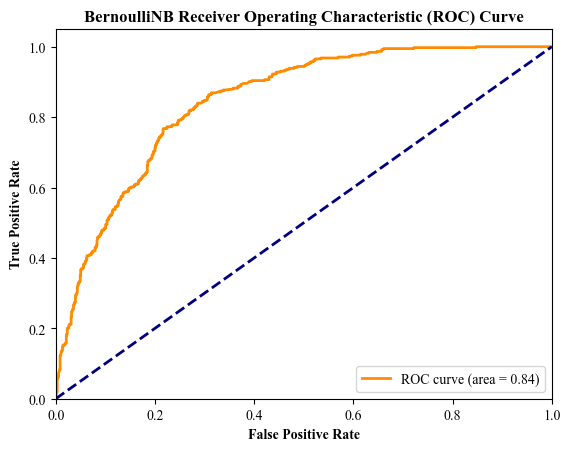

In [76]:
# Train and evaluate the Naive Bayes model.
conf_df, main_df, extra_df = trainer(
    model=nb_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

### 2.2.7. Train and Test the Multi Layer Perceptron Model

In [77]:
# Define the Multi Layer Perceptron model.
mlp_model = MLPClassifier(
    hidden_layer_sizes=(1024, 2048),
    max_iter=1000,
    random_state=42
)

Metric,Value (%)
ROC AUC,83.52
F1 Score,57.73
Accuracy,78.28
Specificity,86.38
Precision,59.71
Sensitivity (Recall),55.88


Metric,Value (%)
PR AUC,60.04
Balanced Accuracy,71.13
Log Loss,120.13
Brier Score,18.88
Matthews Correlation Coefficient (MCC),43.19
Cohen's Kappa,43.14
G-Mean,69.48


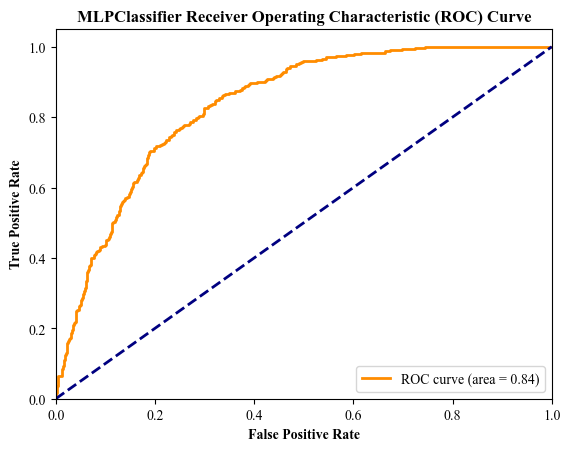

In [78]:
# Train and evaluate the Naive Bayes model.
conf_df, main_df, extra_df = trainer(
    model=mlp_model,
    data_train=data_train_upsampled,
    data_test=data_test,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    results_df=results_first_phase
)

## 2.3. Check the Models' Performance

### 2.3.1. Choose the Best Model

In [79]:
# Show the models' performance comparison table.
display(
    results_first_phase.style
    .apply(
        lambda col: [
            # Use lower-is-better logic for specific metrics, else use higher-is-better
            ("color: green;" if v == col.min() else "color: red;" if v == col.max() else "")
            if col.name in ["Log Loss", "Brier Score"]
            else
            ("color: green;" if v == col.max() else "color: red;" if v == col.min() else "")
            for v in col
        ],
        axis=0
    )
    .set_caption("<b>Model Performance Comparison</b>")
    .hide(axis="index")
    .format(precision=2)
)

Model,Accuracy,Precision,Recall,F1-score,ROC AUC,Specificity,PR AUC,Balanced Accuracy,Log Loss,Brier Score,MCC,Cohen's Kappa,G-Mean
SVC,79.49,57.69,85.29,68.82,88.53,77.39,70.79,81.34,43.24,14.23,56.69,54.38,81.25
RandomForestClassifier,80.77,66.78,54.81,60.21,85.84,90.14,65.32,72.48,61.31,13.16,48.09,47.69,70.29
KNeighborsClassifier,71.54,47.87,81.02,60.18,81.80,68.12,57.14,74.57,96.57,18.78,43.62,40.23,74.29
XGBClassifier,80.70,62.20,69.52,65.66,86.38,84.73,67.61,77.13,43.84,13.95,52.45,52.29,76.75
AdaBoostClassifier,75.87,52.93,82.09,64.36,86.59,73.62,66.27,77.85,54.80,18.16,49.98,47.38,77.74
BernoulliNB,76.22,53.53,79.14,63.86,84.49,75.17,63.54,77.16,55.09,17.42,49.11,47.11,77.13
MLPClassifier,78.28,59.71,55.88,57.73,83.52,86.38,60.04,71.13,120.13,18.88,43.19,43.14,69.48


# **C. Cross Validate the Final Model**

# 1. Prepare the Data for Cross Validation

## 1.1. Create a Copy of the Data to Cross Validate on

### 1.1.1. Copy the Data Variable in a New Variable

In [80]:
# Copy the data in a new variable.
data_copy = data.copy()

## 1.2. Encode the Binary Features

### 1.2.1. Apply Binary Encoding to All Datasets

In [81]:
# Apply binary encoding to all datasets.
encode_binary_features(
    datasets=[data_copy],
    features=binary_features,
    mapping=binary_mapping
)

## 1.4. Encode the Ordinal Features

### 1.4.1. Apply Ordinal Encoding to All Datasets

In [82]:
# Apply ordinal encoding to all datasets.
encode_ordinal_features(
    datasets=[data_copy],
    mappings=ordinal_mappings
)

# 2. Cross Validate the Model

In [83]:
def cross_validated_trainer(
    model,
    data,
    dependent_feature,
    independent_features,
    n_splits,
    results_df
):
    """
    Performs cross-validation with upsampling on each fold, trains and evaluates the model.

    Args:
        model (__any__): A scikit-learn binary classifier with fit and predict methods.
        data (pd.DataFrame): The dataset with pre-encoded features and target.
        dependent_feature (str): The target column name (already binary).
        independent_features (List[str]): Names of the independent feature columns.
        n_splits (int): Number of folds for cross-validation.
        results_df (pd.DataFrame): DataFrame to append the model's evaluation results.

    Returns:
        Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]: Confusion matrix, main metrics, and additional metrics.
    """

    skf = StratifiedKFold(
        n_splits=n_splits,
        shuffle=True,
        random_state=42
    )

    metrics_list = []
    confusion_matrices = []
    tpr_list = []
    mean_fpr = np.linspace(0, 1, 100)

    for train_idx, test_idx in skf.split(data, data[dependent_feature]):
        train_fold = data.iloc[train_idx].copy()
        test_fold = data.iloc[test_idx].copy()

        train_fold_balanced = upsampler(
            train_fold,
            target_feature=dependent_feature,
            majority_value=1,
            minority_value=0
        )

        X_train = train_fold_balanced[independent_features]
        y_train = train_fold_balanced[dependent_feature]
        X_test = test_fold[independent_features]
        y_test = test_fold[dependent_feature]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_scores = model.predict_proba(X_test_scaled)[:, 1]

        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy = accuracy_score(y_test, y_pred)
        pos_class = 1
        precision = report[str(pos_class)]["precision"]
        recall = report[str(pos_class)]["recall"]
        f1 = report[str(pos_class)]["f1-score"]
        roc_auc = roc_auc_score(y_test, y_scores)
        pr_auc = average_precision_score(y_test, y_scores)
        logloss = log_loss(y_test, y_scores)
        brier = brier_score_loss(y_test, y_scores)
        conf_matrix = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = conf_matrix.ravel()
        specificity = tn / (tn + fp)
        balanced_acc = balanced_accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)
        gmean_val = gmean([recall, specificity])

        confusion_matrices.append(conf_matrix)

        metrics_list.append({
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-score": f1,
            "ROC AUC": roc_auc,
            "Specificity": specificity,
            "PR AUC": pr_auc,
            "Balanced Accuracy": balanced_acc,
            "Log Loss": logloss,
            "Brier Score": brier,
            "MCC": mcc,
            "Cohen's Kappa": kappa,
            "G-Mean": gmean_val
        })

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tpr_list.append(interp_tpr)

    # --- Aggregation ---

    avg_metrics = pd.DataFrame(metrics_list).mean()
    avg_conf_matrix = np.round(np.mean(confusion_matrices, axis=0)).astype(int)

    # 1. Confusion Matrix
    conf_df = pd.DataFrame(
        avg_conf_matrix,
        index=pd.MultiIndex.from_product([["Predicted"], [0, 1]]),
        columns=pd.MultiIndex.from_product([["Actual"], [0, 1]])
    )
    display(conf_df.style.set_caption("<b>Confusion Matrix</b>"))

    # 2. Main Metrics
    main_metrics_data = [
        ("ROC AUC", avg_metrics["ROC AUC"] * 100),
        ("F1 Score", avg_metrics["F1-score"] * 100),
        ("Accuracy", avg_metrics["Accuracy"] * 100),
        ("Specificity", avg_metrics["Specificity"] * 100),
        ("Precision", avg_metrics["Precision"] * 100),
        ("Sensitivity (Recall)", avg_metrics["Recall"] * 100),
    ]
    main_metrics_df = pd.DataFrame(main_metrics_data, columns=["Metric", "Value (%)"])
    display(
        main_metrics_df.style
        .set_caption("<b>Main Metrics</b>")
        .format({"Value (%)": "{:.2f}"})
        .hide(axis="index")
    )

    # 3. Additional Metrics
    other_metrics = {
        "PR AUC": avg_metrics["PR AUC"],
        "Balanced Accuracy": avg_metrics["Balanced Accuracy"],
        "Log Loss": avg_metrics["Log Loss"],
        "Brier Score": avg_metrics["Brier Score"],
        "Matthews Correlation Coefficient (MCC)": avg_metrics["MCC"],
        "Cohen's Kappa": avg_metrics["Cohen's Kappa"],
        "G-Mean": avg_metrics["G-Mean"]
    }
    additional_metrics_df = pd.DataFrame(other_metrics.items(), columns=["Metric", "Value"])
    additional_metrics_df["Value (%)"] = additional_metrics_df["Value"].apply(
        lambda x: round(x * 100, 2)
    )
    additional_metrics_df.drop(columns=["Value"], inplace=True)
    display(
        additional_metrics_df.style
        .set_caption("<b>Additional Metrics</b>")
        .format({"Value (%)": "{:.2f}"})
        .hide(axis="index")
    )

    # 4. ROC Plot
    mean_tpr = np.mean(tpr_list, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    plt.figure()
    plt.plot(mean_fpr, mean_tpr, color="darkorange", lw=2, label=f"Mean ROC (AUC = {mean_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate", fontweight="bold")
    plt.ylabel("True Positive Rate", fontweight="bold")
    plt.title(f"SVC Cross-Validated ({n_splits}-Fold) Receiver Operating Characteristic (ROC) Curve", fontweight="bold")
    plt.legend(loc="lower right")
    plt.show()

    # 5. Append to results_df
    combined_metrics = pd.concat([main_metrics_df, additional_metrics_df])
    metrics_dict = {
        row["Metric"]: row["Value (%)"]
        for _, row in combined_metrics.iterrows()
    }

    row = {
        "Model": f"SVC Cross-Validated ({n_splits}-Fold)",
        "Accuracy": metrics_dict.get("Accuracy"),
        "Precision": metrics_dict.get("Precision"),
        "Recall": metrics_dict.get("Sensitivity (Recall)", metrics_dict.get("Recall")),
        "F1-score": metrics_dict.get("F1 Score"),
        "ROC AUC": metrics_dict.get("ROC AUC"),
        "Specificity": metrics_dict.get("Specificity"),
        "PR AUC": metrics_dict.get("PR AUC"),
        "Balanced Accuracy": metrics_dict.get("Balanced Accuracy"),
        "Log Loss": metrics_dict.get("Log Loss"),
        "Brier Score": metrics_dict.get("Brier Score"),
        "MCC": metrics_dict.get("Matthews Correlation Coefficient (MCC)"),
        "Cohen's Kappa": metrics_dict.get("Cohen's Kappa"),
        "G-Mean": metrics_dict.get("G-Mean")
    }

    results_df.loc[len(results_df)] = row

    return conf_df, main_metrics_df, additional_metrics_df

Metric,Value (%)
ROC AUC,87.58
F1 Score,66.77
Accuracy,77.96
Specificity,76.00
Precision,55.68
Sensitivity (Recall),83.41


Metric,Value (%)
PR AUC,70.94
Balanced Accuracy,79.70
Log Loss,44.99
Brier Score,14.93
Matthews Correlation Coefficient (MCC),53.61
Cohen's Kappa,51.25
G-Mean,79.61


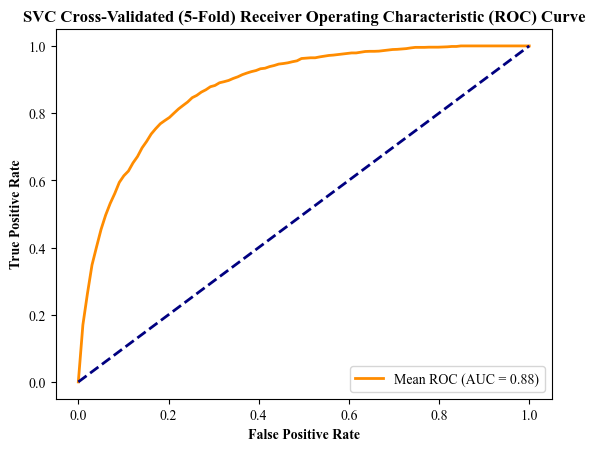

In [84]:
conf_df, main_df, extra_df = cross_validated_trainer(
    model=SVC(kernel="linear", C=1, probability=True, random_state=42),
    data=data_copy,
    dependent_feature="Churn Label",
    independent_features=independent_features,
    n_splits=5,
    results_df=results_first_phase
)

### 2.3.1. Choose the Best Model

In [85]:
# Show the models' performance comparison table.
display(
    results_first_phase.style
    .apply(
        lambda col: [
            "color: green;" if v == col.max() else "color: red;" if v == col.min() else ""
            for v in col
        ] if col.name != "Model" else ["" for _ in col],
        axis=0
    )
    .set_caption("<b>Model Performance Comparison</b>")
    .hide(axis="index")
    .format(precision=2)
)

Model,Accuracy,Precision,Recall,F1-score,ROC AUC,Specificity,PR AUC,Balanced Accuracy,Log Loss,Brier Score,MCC,Cohen's Kappa,G-Mean
SVC,79.49,57.69,85.29,68.82,88.53,77.39,70.79,81.34,43.24,14.23,56.69,54.38,81.25
RandomForestClassifier,80.77,66.78,54.81,60.21,85.84,90.14,65.32,72.48,61.31,13.16,48.09,47.69,70.29
KNeighborsClassifier,71.54,47.87,81.02,60.18,81.80,68.12,57.14,74.57,96.57,18.78,43.62,40.23,74.29
XGBClassifier,80.70,62.20,69.52,65.66,86.38,84.73,67.61,77.13,43.84,13.95,52.45,52.29,76.75
AdaBoostClassifier,75.87,52.93,82.09,64.36,86.59,73.62,66.27,77.85,54.80,18.16,49.98,47.38,77.74
BernoulliNB,76.22,53.53,79.14,63.86,84.49,75.17,63.54,77.16,55.09,17.42,49.11,47.11,77.13
MLPClassifier,78.28,59.71,55.88,57.73,83.52,86.38,60.04,71.13,120.13,18.88,43.19,43.14,69.48
SVC Cross-Validated (5-Fold),77.96,55.68,83.41,66.77,87.58,76.00,70.94,79.70,44.99,14.93,53.61,51.25,79.61


# **D. Extract the Best Model's Most Important Features**

# 1. Get the Data Prepared

## 1.1. Split the Data into Train and Test Sets

### 1.1.1. Split the Data

In [86]:
# Split the data into train and test sets based on the "Appendicitis" column.
data_train, data_test = train_test_split(
    data,
    test_size=0.2,
    stratify=data["Churn Label"],
    random_state=42
)

## 1.2. Upsample the Training Data to Balance the Classes

### 1.2.1. Upsample the Datasets

In [87]:
# Upsample the training data to balance the classes.
data_train_upsampled = upsampler(
    data_train,
    target_feature="Churn Label",
    majority_value="No",
    minority_value="Yes"
    )

## 1.3. Encode the Binary Features

### 1.3.1. Apply Binary Encoding to All Datasets

In [88]:
# Apply binary encoding to all datasets.
encode_binary_features(
    datasets=[data_train, data_train_upsampled, data_test],
    features=binary_features,
    mapping=binary_mapping
)

## 1.4. Encode the Ordinal Features

### 1.4.1. Apply Ordinal Encoding to All Datasets

In [89]:
# Apply ordinal encoding to all datasets.
encode_ordinal_features(
    datasets=[data_train, data_train_upsampled, data_test],
    mappings=ordinal_mappings
)

## 1.5. Scale the Dataset

### 1.5.1. Scale the Dataset

In [90]:
X_train = data_train[independent_features]
y_train = data_train["Churn Label"]
X_test = data_test[independent_features]
y_test = data_test["Churn Label"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Let the Machine Learn

## 2.1. Define the Best Model

### 2.1.1. Define the Best Model

In [91]:
# Define the SVC model.
svc_model = SVC(
    kernel="linear",
    C=1,
    probability=True,
    random_state=42
)

## 2.2. Train the Best Model

### 2.2.1. Train the Defined Model

In [92]:
# Train and predict.
svc_model.fit(X_train_scaled, y_train)
y_pred = svc_model.predict(X_test_scaled)

# 3. Analyze the Model's Most Important Significant Features Using SHAP

## 3.1. Create a Dataframe of the Train Input Data

### 3.1.1. Convert the Input Data into a Dataframe

In [93]:
# Convert the scaled training data back to a DataFrame.
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=independent_features
)

## 3.2. Define the SHAP Explainer

In [94]:
# Create a SHAP explainer object for the model using the scaled train data
explainer = shap.Explainer(svc_model, X_train_scaled_df)

In [95]:
# Calculate SHAP values for the scaled train data
shap_values = explainer.shap_values(X_train_scaled_df)

In [96]:
# Calculate and display the average SHAP value for each column

shap_df = pd.DataFrame(shap_values, columns=X_train_scaled_df.columns)
average_shap_values = shap_df.abs().mean(axis=0)
print("Average for each column separately:\n")
average_shap_values.to_frame(name="Average Shap Value").sort_values(by="Average Shap Value", ascending=False).head(20)

Average for each column separately:



,Average Shap Value
Number of Referrals,8.23e-01
Tenure in Months,7.78e-01
Married,5.78e-01
Internet Type,5.12e-01
Number of Dependents,2.88e-01
Premium Tech Support,2.07e-01
Payment Method,1.70e-01
Online Security,1.63e-01
Paperless Billing,1.43e-01
Streaming Music,1.32e-01


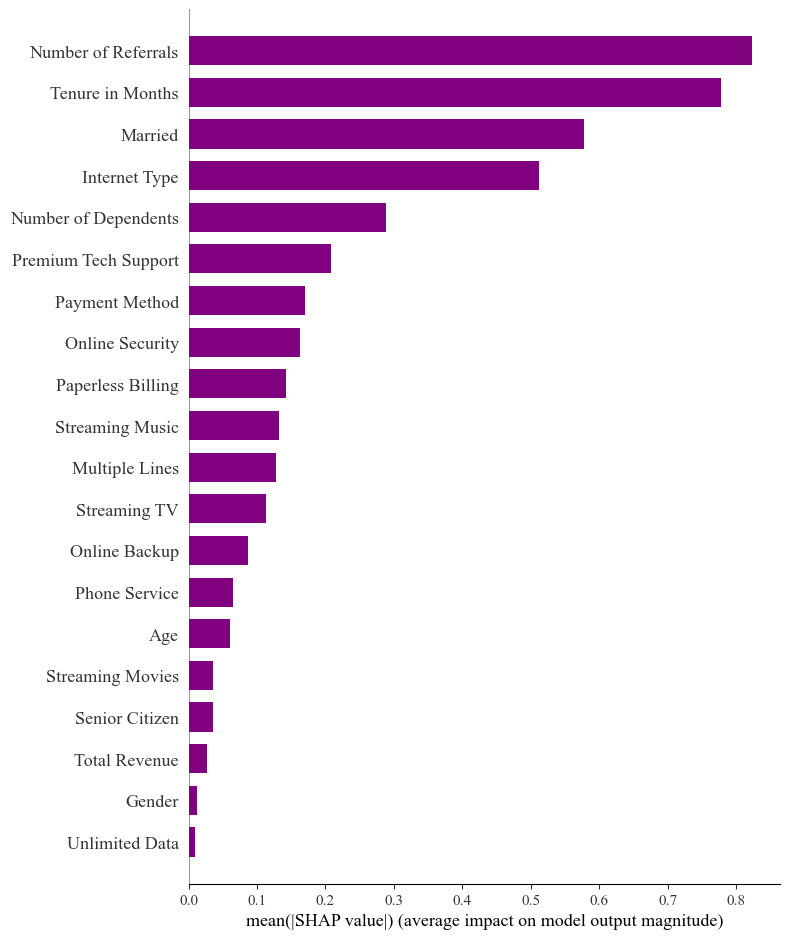

In [97]:
# Generate summary plot using SHAP values
shap.summary_plot(shap_values, X_train_scaled_df, plot_type="bar", color="purple", max_display=20)

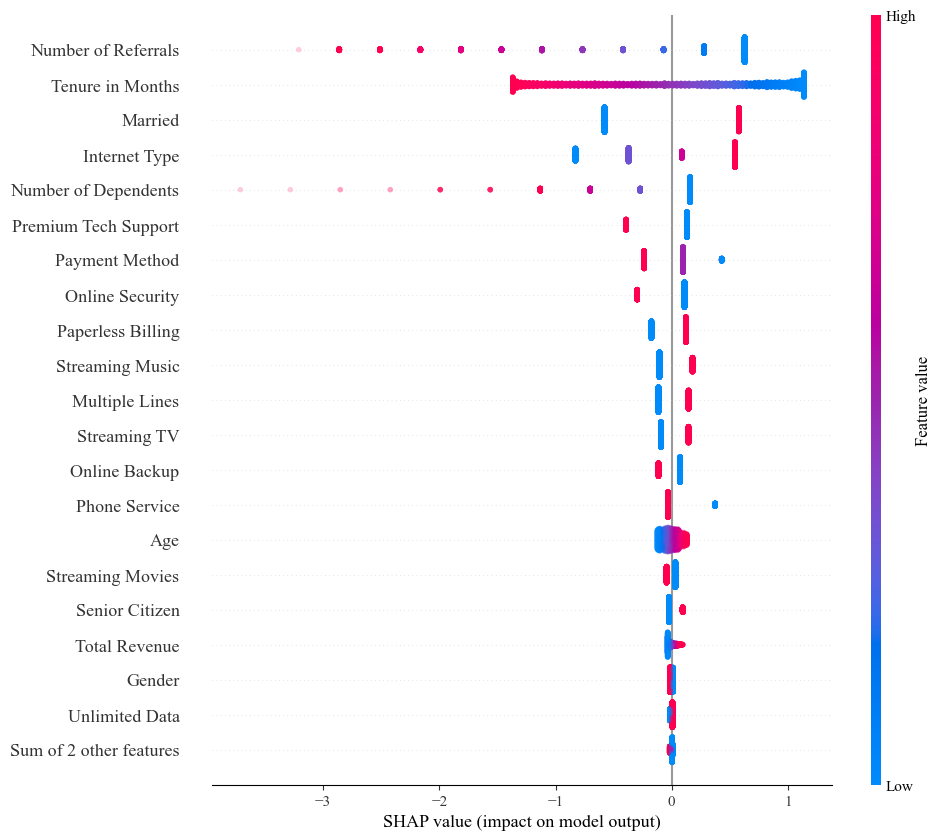

In [98]:
# Get the SHAP values
shap_values = explainer(X_train_scaled_df)

# Plot the beeswarm plot
shap.plots.beeswarm(shap_values, max_display=21, color_bar=True, alpha=0.2, plot_size=(10, 10))